# Data Science Challenge

## The problem is to find a binary classification of yearly avaialability of hotels

https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

The hypothesis representation, $h_{\theta}(x) = g(\theta^{T} x)$, where $z = \theta^{T} x$, and $g(z) = \frac{1}{1 + e^{-z}}$. The function is called **logistic function or sigmoid function**, where $h_{\theta} (x) = [0, 1]$. Hence, $h_{\theta}(x) = P(y = 1 | x, \theta) = 1 - P(y = 0| x, \theta)$.

In [12]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [13]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [14]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [15]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [16]:
#Explore columns
print(data.columns)
print(data.dtypes)

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')
id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object


In [17]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692463,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


#### Steps in data wrangling and cleaning

1. Dropping the column id.
2. Checking if there are missing values in any columns.
3. Only one column has missing values: reviews_per_month. Replacing the missing values by the column average.
4. Converting the accomodation_type column to a float column with numerical data replacing the three unique types present.
5. Converting the region column to a float column with numerical data replacing the five unique types present.
6. Generating scatter plot to understand if there are weird outliers in the following columns: 

In [18]:
column_list = data.columns.to_list()
print(column_list)
for i in column_list:
    print("The number of missing values in", i, "is", data[i].isna().sum())

['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id', 'owned_hotels', 'yearly_availability']
The number of missing values in id is 0
The number of missing values in region is 0
The number of missing values in latitude is 0
The number of missing values in longitude is 0
The number of missing values in accommodation_type is 0
The number of missing values in cost is 0
The number of missing values in minimum_nights is 0
The number of missing values in number_of_reviews is 0
The number of missing values in reviews_per_month is 676
The number of missing values in owner_id is 0
The number of missing values in owned_hotels is 0
The number of missing values in yearly_availability is 0


In [19]:
data = data.drop('id', axis = 1)
data.loc[data.reviews_per_month.isna(), 'reviews_per_month'] = round(data.reviews_per_month.mean())
print("The number of missing values in reviews_per_month is", data.reviews_per_month.isna().sum())

The number of missing values in reviews_per_month is 0


['Entire home/apt' 'Private room' 'Shared room']


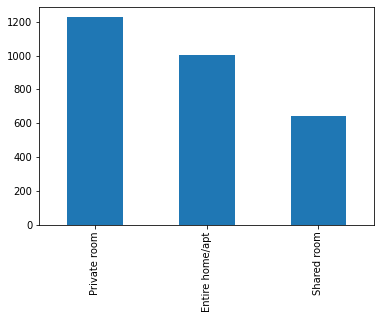

In [20]:
data['accommodation_type'].value_counts().plot(kind='bar')
sns.despine

print(data.accommodation_type.unique())
data.loc[data.accommodation_type == "Entire home/apt", "accommodation_type"] = 1
data.loc[data.accommodation_type == "Private room", "accommodation_type"] = 2
data.loc[data.accommodation_type == "Shared room", "accommodation_type"] = 0

data = data.astype({'accommodation_type': float})

['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']


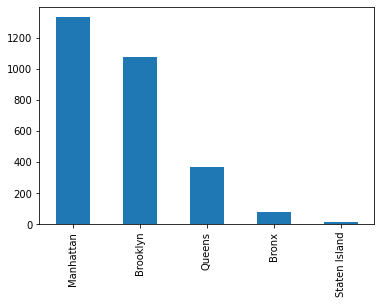

In [21]:
print(data.region.unique())
data['region'].value_counts().plot(kind='bar')
sns.despine

data.loc[data.region == "Manhattan", "region"] = 4
data.loc[data.region == "Brooklyn", "region"] = 3
data.loc[data.region == "Queens", "region"] = 2
data.loc[data.region == "Bronx", "region"] = 1
data.loc[data.region == "Staten Island", "region"] = 0

data = data.astype({'region': float})

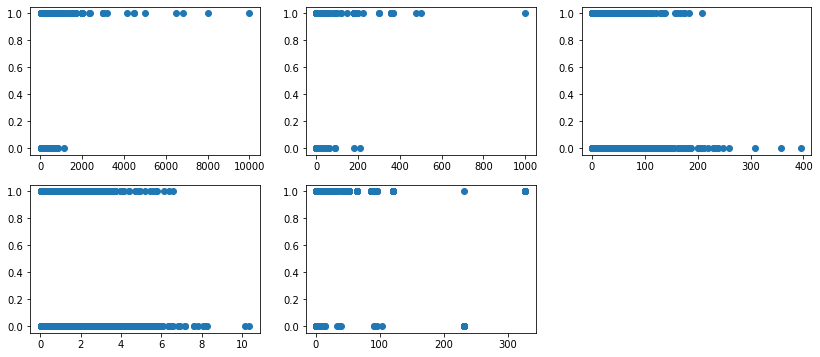

In [41]:
set1 = ['cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owned_hotels']
plt.figure(figsize=(14, 6))
for i, col in enumerate(set1):
    plt.subplot(2, 3, i+1)
    plt.scatter(data[col], data.yearly_availability)

### Handling outliers

We observe only one set of outlier where the number of owned hotels is more than 200 and the yearly availability is 0. However, the number of data points are too much to call them outliers.

In [42]:
filtered_data = data[data['owned_hotels'] > 200]
filtered_data

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
84,4.0,40.76008,-73.98721,2.0,227,29,0,1.00,219517861,327,1
246,4.0,40.71686,-74.00484,1.0,305,30,0,1.00,107434423,232,0
260,4.0,40.73021,-74.00379,1.0,305,30,0,1.00,107434423,232,0
442,4.0,40.70887,-74.01446,2.0,233,30,0,1.00,107434423,232,1
483,4.0,40.74285,-73.99595,2.0,277,29,0,1.00,219517861,327,1
504,4.0,40.71659,-74.00653,1.0,388,30,0,1.00,107434423,232,0
1154,4.0,40.75194,-73.99501,1.0,243,30,0,1.00,107434423,232,0
1455,4.0,40.73897,-73.99637,1.0,280,30,0,1.00,107434423,232,0
1611,4.0,40.74883,-73.97520,2.0,200,29,0,1.00,219517861,327,1
1990,4.0,40.75146,-73.99000,2.0,215,30,0,1.00,107434423,232,0


#### Pearson coefficient

Next we check the pearson coefficient to understand the correlation between the numerical variables and the target variable: yearly_availability

We observe there are a few variables that have very low correlation with the target variable.
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

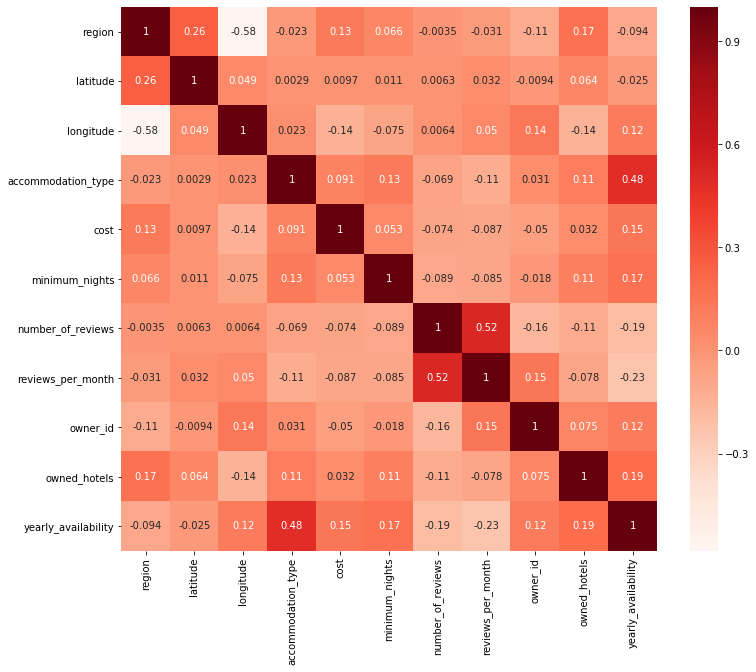

In [122]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### First approach: Logistic Regression
First we try to make a logical regression model. After fitting the model on the training data and testing the accuracy on the testing data (sliced 33% of the dataframe), the accuracy is only ~50%

#### Corrected Approach: Decision Tree
We change our strategy. We choose decision tree to make the model. We obtain accuracy ~88%

In [123]:
from sklearn.model_selection import train_test_split
y = pd.DataFrame(data['yearly_availability'])
data = data.drop('yearly_availability', axis = 1)
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=1)
from sklearn.linear_model import LogisticRegression
semiLRmodel = LogisticRegression(solver='liblinear', random_state=0)
semiLRmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix
print(semiLRmodel.score(X_test, y_test))
confusion_matrix(y_test, semiLRmodel.predict(X_test))

0.5073839662447257


array([[  0, 467],
       [  0, 481]])

## Decision Tree

Root node, splitting node, parent node, leaf node

What is pruning a tree?
We split a node further based on a feature.

Why is pruning a tree important?
1. to avoid overfitting
2. to improve predictive accuracy
3. to reduce complexity

decision boundary: boundaries on the decision plane

We split a decision tree based on a feature in a way that maximizes the **information gain**. We measure the information gain as difference between the impurity of parent node and sum of the impurities of the children nodes. For a decision tree node $D_p$ that has $N_p$ data points, splitted by feature $f$, where each children node $D_j$ has $N_j$ data points, and there are $N$ labels in total:
$$IG(D_p, f) = I(D_p) - \sum_{j = 1}^{N} \frac{N_i}{N_p} I(D_j)$$
Our objective is to lower the impurity of the children nodes. There are largely three ways to select the impurity measure as information gain.
1. **Gini impurity (IG):** 
IG is defined as a measure that denotes how often do we label a randomly chosen element incorrectly if it is labelled randomly according to the distribution of the labels in the subset. Mathematically, $IG = 1 - \sum_{i=1}{j} p_i^2$, where \# of classes present = $j$ and $p$ is the distribution of classes in the node.
<img src="decision_tree.jpeg" alt="drawing" width="300"/>
$$IG_{l} = 1 - (\frac{N_{l_1}}{N_{l_1} + N_{l_2}})^2 - (\frac{N_{l_2}}{N_{l_1} + N_{l_2}})^2 \text{ and } IG_{r} = 1 - (\frac{N_{r_1}}{N_{r_1} + N_{r_2}})^2 - (\frac{N_{r_2}}{N_{r_1} + N_{r_2}})^2 \text{ and } IG = (\frac{N_1}{N_1 + N_2}) IG_{l} + (\frac{N_2}{N_1 + N_2}) IG_{r}$$
2. **Entropy (IH):** 
$$IH = - \sum_{i = 1}^{j} p_i log_2{p_i} \text{, where } j = \text{ # classes present and } p = \text{ distribition of classes on the node}$$
$$IH_{target} = - (\frac{N_1}{N_1 + N_2}) \log_2 (\frac{N_1}{N_1 + N_2}) - (\frac{N_2}{N_1 + N_2}) \log_2 (\frac{N_2}{N_1 + N_2})$$
$$IH_{l} = - (\frac{N_{l_1}}{N_{l_1} + N_{l_2}}) \log_2 (\frac{N_{l_1}}{N_{l_1} + N_{l_2}}) - (\frac{N_{l_2}}{N_{l_1} + N_{l_2}}) \log_2 (\frac{N_{l_2}}{N_{l_1} + N_{l_2}}) \text{ and } IH = IH_{target} - IH_{l} - IH_{r}$$
3. **Misclassification Error (IE):**
$$IE = 1 - \max(p(i \text{ \ } j))$$


#### How to deal with continuous data: CART (Classification and Regression Tree)
1. Get average of each gap in the data.
2. Caculate IG for each such value.
3. Choose the one for which IG is the lowest (maximum information gain).

#### 

### Confusion matrix, Precision, Recall, F Score

For a classification task, where 1 = positively classified and 0 = negatively classified
1. TP: true label = 1, predicted label = 1
2. FP: true label = 0, predicted label = 1
3. TN: true label = 0, predicted label = 0
4. FN: true label = 1, predicted label = 0

Confusion Matrix: 

\[TP FN\]
\[FP TN\]

Precision, therefore, calculates the accuracy for the minority class. 
$Precision = \frac{TP}{TP + FP}$

Unlike precision that only comments on the correct positive predictions out of all positive predictions, recall provides an indication of missed positive predictions.
$Recall = \frac{TP}{TP + FN}$

Alone, neither precision or recall tells the whole story. We can have excellent precision with terrible recall, or alternately, terrible precision with excellent recall. F-measure provides a way to express both concerns with a single score. This is the harmonic mean of the two fractions.

$Fscore = (2 * Precision * Recall) / (Precision + Recall)$

https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

In [125]:
from sklearn import tree
semiDTmodel = tree.DecisionTreeClassifier()
semiDTmodel = semiDTmodel.fit(X_train, y_train)
print(semiDTmodel.score(X_test, y_test))
confusion_matrix(y_test, semiDTmodel.predict(X_test))

0.8776371308016878


array([[414,  53],
       [ 63, 418]])

In [126]:
data.columns.to_list()

['region',
 'latitude',
 'longitude',
 'accommodation_type',
 'cost',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'owner_id',
 'owned_hotels']

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [127]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

submission_df = pd.DataFrame(columns = ['id', 'yearly_availability'])
submission_df['id'] = test_data['id']
test_data = test_data.drop('id', axis = 1)

In [128]:
print(test_data.region.unique())
print(test_data.accommodation_type.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
['Shared room' 'Entire home/apt' 'Private room']


In [129]:
test_data.loc[test_data.region == "Manhattan", "region"] = 4
test_data.loc[test_data.region == "Brooklyn", "region"] = 3
test_data.loc[test_data.region == "Queens", "region"] = 2
test_data.loc[test_data.region == "Bronx", "region"] = 1
test_data.loc[test_data.region == "Staten Island", "region"] = 0

test_data = test_data.astype({'region': float})

test_data.loc[test_data.accommodation_type == "Entire home/apt", "accommodation_type"] = 1
test_data.loc[test_data.accommodation_type == "Private room", "accommodation_type"] = 2
test_data.loc[test_data.accommodation_type == "Shared room", "accommodation_type"] = 0

test_data = test_data.astype({'accommodation_type': float})

In [130]:

print(test_data.columns.to_list())

print(test_data.latitude.isna().sum())
print(test_data.longitude.isna().sum())
print(test_data.accommodation_type.isna().sum())
print(test_data.cost.isna().sum())
print(test_data.minimum_nights.isna().sum())
print(test_data.number_of_reviews.isna().sum())
print(test_data.reviews_per_month.isna().sum())
print(test_data.owner_id.isna().sum())
print(test_data.owned_hotels.isna().sum())

test_data.loc[test_data.reviews_per_month.isna(), 'reviews_per_month'] = round(test_data.reviews_per_month.mean())

print(test_data.reviews_per_month.isna().sum())

['region', 'latitude', 'longitude', 'accommodation_type', 'cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id', 'owned_hotels']
0
0
0
0
0
0
173
0
0
0




**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [131]:
data.columns.to_list()

['region',
 'latitude',
 'longitude',
 'accommodation_type',
 'cost',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'owner_id',
 'owned_hotels']

#### Using the mutual information gain

The mutual information gain cannot increase the prediction accuracy. That means the prediction accuracy is fairly stable with the input variables.

From the absolute values of the pearson correlation coefficients, we can understand the feature importance. If we sort them in an ascending order, it looks like as follows:
'latitude' < 'region' < 'longitude' < 'owner_id' < 'cost' < 'minimum_nights' < 'number_of_reviews' < 'owned_hotels' < 'reviews_per_month' < 'accommodation_type'

In [132]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
def select_ig_based_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_ig_based_features(X_train, y_train, X_test)
semiDTmodel2 = tree.DecisionTreeClassifier()
semiDTmodel2 = semiDTmodel2.fit(X_train_fs, y_train)
print(semiDTmodel.score(X_test_fs, y_test))
confusion_matrix(y_test, semiDTmodel2.predict(X_test))

0.8776371308016878


array([[408,  59],
       [ 60, 421]])

In [133]:
cor_list = []
feature_name = data.columns.tolist()
for i in feature_name:
    cor = np.corrcoef(data[i], y)
    print(i, cor[0,1])
    cor_list.append(cor[0,1])
cor_list = [0 if np.isnan(i) else i for i in cor_list]
cor_feature = data.iloc[:,np.argsort(np.abs(cor_list))[-10:]].columns.tolist()
cor_support = [True if i in cor_feature else False for i in feature_name]
print(cor_list, cor_feature, cor_support)

region -0.09367376413132177
latitude -0.02511910040395189
longitude 0.11988189398717922
accommodation_type 0.4808515844145509
cost 0.14757638366762357
minimum_nights 0.17355023840575715
number_of_reviews -0.1916452729428953
reviews_per_month -0.23234457948325832
owner_id 0.12123357520094889
owned_hotels 0.19190647360874957
[-0.09367376413132177, -0.02511910040395189, 0.11988189398717922, 0.4808515844145509, 0.14757638366762357, 0.17355023840575715, -0.1916452729428953, -0.23234457948325832, 0.12123357520094889, 0.19190647360874957] ['latitude', 'region', 'longitude', 'owner_id', 'cost', 'minimum_nights', 'number_of_reviews', 'owned_hotels', 'reviews_per_month', 'accommodation_type'] [True, True, True, True, True, True, True, True, True, True]


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [134]:
LRmodel = LogisticRegression(solver='liblinear', random_state=0)
LRmodel.fit(data, y)
y_predict = LRmodel.predict(test_data)
submission_df['yearly_availability'] = y_predict

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

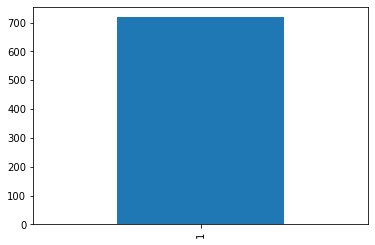

In [135]:
submission_df['yearly_availability'].value_counts().plot(kind='bar')
sns.despine

In [136]:
DTmodel = tree.DecisionTreeClassifier()
DTmodel = DTmodel.fit(data, y)
y_predict = DTmodel.predict(test_data)
submission_df['yearly_availability'] = y_predict

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

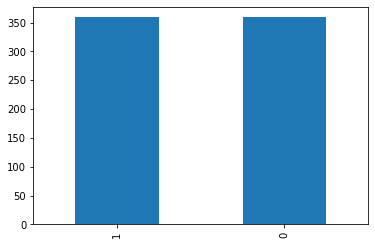

In [137]:
submission_df['yearly_availability'].value_counts().plot(kind='bar')
sns.despine

In [138]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---